### Demo some block stimuli functions

- Generate a bunch of worlds and analyze their relational properties to help identify which are interesting, and to measure those properties in the population


In [2]:
from __future__ import division

import numpy as np
import os, sys
from PIL import Image

from matplotlib import pylab, mlab, pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.path import Path
import matplotlib.patches as patches
%matplotlib inline

from IPython.core.pylabtools import figsize, getfigs

import seaborn as sns

import random

from scipy.stats import norm
from IPython.display import clear_output

import copy
import importlib


### Add Paths

## root paths
curr_dir = os.getcwd()
proj_dir = os.path.abspath(os.path.join(curr_dir,'..','..')) ## use relative paths

## add helpers to python path
import sys
if os.path.join(proj_dir, 'stimuli') not in sys.path:
    sys.path.append(os.path.join(proj_dir, 'stimuli'))

## custom helper modules
import separation_axis_theorem as sat
import blockworld_helpers as utils

/Users/will/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### sample single random world and render it

World is a python class, however we want to be able to save them to JSON so they can be stored in a database and read by javascript.

In [ ]:
# if you make any changes to blockworld_helpers, you need to reload the library to see changes
importlib.reload(utils)

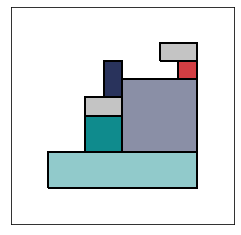

Area filled = 43
Num blocks = 7
Timestamp = 1612986710


In [3]:
## Create world, fill it with blocks, and save in dictionary format
_w = utils.World()
_w.fill_world()
block_dict = _w.get_block_dict() 

## Build world from dictionary format
w = utils.World()
w.populate_from_block_dict(block_dict)

## remove some blocks to make it more interesting
w2 = utils.jenga_blocks(w,10)
utils.draw_world(w2)

# calculate some properties
area_filled = np.sum(w2.block_map)
num_blocks = len(w2.blocks)
import datetime
timestamp = np.int(datetime.datetime.now().timestamp())
print('Area filled = {}'.format(area_filled))
print('Num blocks = {}'.format(num_blocks))
print('Timestamp = {}'.format(timestamp))

In [5]:
w2, block_dict = utils.generate_random_world()

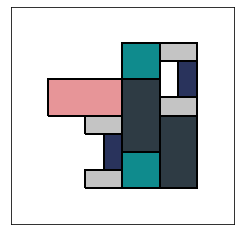

In [4]:
# generates a bunch of worlds which you can then look at

importlib.reload(utils)
from IPython.display import clear_output
num_worlds = 100
for i in np.arange(num_worlds):
    try:
        # generate world
        w, block_dict = utils.generate_random_world()
        # save world
        utils.save_world(block_dict)
        clear_output(wait=True)
    except:
        pass

### A few snippets that might be useful

In [8]:
total_area = 0
for block in block_dict['blocks']:
    total_area += (block['height'] * block['width'])

In [9]:
len(block_dict['blocks'])

7

In [10]:
block_list = []
for i,this_block in enumerate(w2.blocks):
    newdict = dict()
    olddict = vars(w2.blocks[i])
    for (key,value) in olddict.items():
        if key in['x','y','width','height']:
            newdict[key] = value
    block_list.append(newdict)
block_dict = {"blocks":block_list}

In [11]:
## will-curated block structures
w1 = {"blocks": [{"width": 4, "height": 2, "x": 0, "y": 0}, {"width": 4, "height": 2, "x": 4, "y": 0}, {"width": 2, "height": 4, "x": 0, "y": 2}, {"width": 4, "height": 2, "x": 3, "y": 2}, {"width": 4, "height": 2, "x": 2, "y": 4}, {"width": 2, "height": 1, "x": 6, "y": 4}, {"width": 1, "height": 1, "x": 6, "y": 5}, {"width": 1, "height": 2, "x": 7, "y": 5}, {"width": 1, "height": 1, "x": 0, "y": 6}, {"width": 2, "height": 2, "x": 3, "y": 6}, {"width": 1, "height": 1, "x": 5, "y": 6}, {"width": 1, "height": 2, "x": 6, "y": 6}, {"width": 1, "height": 1, "x": 0, "y": 7}, {"width": 1, "height": 1, "x": 5, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w2 ={"blocks": [{"width": 2, "height": 4, "x": 0, "y": 0}, {"width": 4, "height": 4, "x": 3, "y": 0}, {"width": 1, "height": 2, "x": 7, "y": 0}, {"width": 1, "height": 1, "x": 7, "y": 2}, {"width": 1, "height": 1, "x": 7, "y": 3}, {"width": 2, "height": 2, "x": 0, "y": 4}, {"width": 4, "height": 2, "x": 2, "y": 4}, {"width": 1, "height": 2, "x": 6, "y": 4}, {"width": 1, "height": 1, "x": 7, "y": 4}, {"width": 1, "height": 2, "x": 7, "y": 5}, {"width": 1, "height": 1, "x": 0, "y": 6}, {"width": 1, "height": 1, "x": 5, "y": 6}, {"width": 1, "height": 1, "x": 0, "y": 7}, {"width": 1, "height": 1, "x": 5, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w3 = {"blocks": [{"width": 2, "height": 1, "x": 1, "y": 0}, {"width": 1, "height": 2, "x": 5, "y": 0}, {"width": 2, "height": 4, "x": 6, "y": 0}, {"width": 2, "height": 1, "x": 1, "y": 1}, {"width": 4, "height": 4, "x": 0, "y": 2}, {"width": 2, "height": 1, "x": 4, "y": 2}, {"width": 2, "height": 4, "x": 4, "y": 3}, {"width": 2, "height": 1, "x": 6, "y": 4}, {"width": 1, "height": 2, "x": 7, "y": 5}, {"width": 1, "height": 1, "x": 4, "y": 7}, {"width": 2, "height": 1, "x": 5, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w4 = {"blocks": [{"width": 4, "height": 2, "x": 1, "y": 0}, {"width": 2, "height": 1, "x": 5, "y": 0}, {"width": 1, "height": 2, "x": 7, "y": 0}, {"width": 2, "height": 1, "x": 5, "y": 1}, {"width": 4, "height": 2, "x": 0, "y": 2}, {"width": 1, "height": 1, "x": 6, "y": 2}, {"width": 1, "height": 2, "x": 7, "y": 2}, {"width": 1, "height": 2, "x": 6, "y": 3}, {"width": 4, "height": 2, "x": 0, "y": 4}, {"width": 1, "height": 1, "x": 7, "y": 4}, {"width": 4, "height": 2, "x": 4, "y": 5}, {"width": 1, "height": 1, "x": 0, "y": 6}, {"width": 2, "height": 2, "x": 1, "y": 6}, {"width": 1, "height": 1, "x": 3, "y": 6}, {"width": 1, "height": 1, "x": 0, "y": 7}, {"width": 2, "height": 1, "x": 3, "y": 7}, {"width": 2, "height": 1, "x": 5, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w5 = {"blocks": [{"width": 4, "height": 4, "x": 0, "y": 0}, {"width": 1, "height": 2, "x": 4, "y": 0}, {"width": 1, "height": 2, "x": 7, "y": 0}, {"width": 1, "height": 2, "x": 4, "y": 2}, {"width": 1, "height": 2, "x": 7, "y": 2}, {"width": 2, "height": 1, "x": 0, "y": 4}, {"width": 4, "height": 2, "x": 4, "y": 4}, {"width": 1, "height": 2, "x": 0, "y": 5}, {"width": 1, "height": 1, "x": 4, "y": 6}, {"width": 1, "height": 2, "x": 5, "y": 6}, {"width": 2, "height": 1, "x": 6, "y": 6}, {"width": 1, "height": 1, "x": 0, "y": 7}, {"width": 1, "height": 1, "x": 4, "y": 7}, {"width": 1, "height": 1, "x": 6, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w6 = {"blocks": [{"width": 2, "height": 2, "x": 1, "y": 0}, {"width": 1, "height": 1, "x": 5, "y": 0}, {"width": 2, "height": 4, "x": 6, "y": 0}, {"width": 1, "height": 1, "x": 5, "y": 1}, {"width": 4, "height": 2, "x": 0, "y": 2}, {"width": 4, "height": 2, "x": 0, "y": 4}, {"width": 2, "height": 1, "x": 5, "y": 4}, {"width": 1, "height": 2, "x": 7, "y": 4}, {"width": 2, "height": 1, "x": 5, "y": 5}, {"width": 4, "height": 2, "x": 0, "y": 6}, {"width": 2, "height": 1, "x": 4, "y": 6}, {"width": 1, "height": 2, "x": 6, "y": 6}, {"width": 1, "height": 2, "x": 7, "y": 6}, {"width": 2, "height": 1, "x": 4, "y": 7}]}
w7 = {"blocks": [{"width": 2, "height": 4, "x": 0, "y": 0}, {"width": 2, "height": 1, "x": 3, "y": 0}, {"width": 1, "height": 2, "x": 6, "y": 0}, {"width": 1, "height": 2, "x": 7, "y": 0}, {"width": 4, "height": 4, "x": 2, "y": 1}, {"width": 1, "height": 2, "x": 6, "y": 2}, {"width": 1, "height": 2, "x": 7, "y": 2}, {"width": 1, "height": 1, "x": 1, "y": 4}, {"width": 1, "height": 2, "x": 6, "y": 4}, {"width": 1, "height": 1, "x": 7, "y": 4}, {"width": 2, "height": 2, "x": 0, "y": 5}, {"width": 2, "height": 2, "x": 2, "y": 5}, {"width": 1, "height": 1, "x": 5, "y": 5}, {"width": 1, "height": 2, "x": 7, "y": 5}, {"width": 2, "height": 2, "x": 4, "y": 6}, {"width": 1, "height": 1, "x": 6, "y": 6}, {"width": 2, "height": 1, "x": 0, "y": 7}, {"width": 2, "height": 1, "x": 2, "y": 7}, {"width": 2, "height": 1, "x": 6, "y": 7}]}
w8 = {"blocks": [{"width": 2, "height": 4, "x": 0, "y": 0}, {"width": 4, "height": 2, "x": 2, "y": 0}, {"width": 2, "height": 4, "x": 6, "y": 0}, {"width": 1, "height": 2, "x": 3, "y": 2}, {"width": 2, "height": 2, "x": 2, "y": 4}, {"width": 1, "height": 1, "x": 6, "y": 4}, {"width": 1, "height": 2, "x": 7, "y": 4}, {"width": 1, "height": 1, "x": 6, "y": 5}, {"width": 8, "height": 2, "x": 0, "y": 6}]}
w9 ={"blocks": [{"width": 1, "height": 1, "x": 1, "y": 0}, {"width": 4, "height": 2, "x": 3, "y": 0}, {"width": 1, "height": 1, "x": 7, "y": 0}, {"width": 2, "height": 2, "x": 0, "y": 1}, {"width": 1, "height": 2, "x": 7, "y": 1}, {"width": 4, "height": 4, "x": 2, "y": 2}, {"width": 1, "height": 1, "x": 1, "y": 3}, {"width": 1, "height": 2, "x": 7, "y": 3}, {"width": 1, "height": 1, "x": 1, "y": 4}, {"width": 2, "height": 1, "x": 0, "y": 5}, {"width": 1, "height": 1, "x": 7, "y": 5}, {"width": 4, "height": 2, "x": 0, "y": 6}, {"width": 1, "height": 1, "x": 4, "y": 6}, {"width": 2, "height": 2, "x": 5, "y": 6}, {"width": 1, "height": 2, "x": 7, "y": 6}, {"width": 1, "height": 1, "x": 4, "y": 7}]}
w10 = {"blocks": [{"width": 1, "height": 1, "x": 0, "y": 0}, {"width": 2, "height": 4, "x": 5, "y": 0}, {"width": 1, "height": 1, "x": 7, "y": 0}, {"width": 1, "height": 1, "x": 0, "y": 1}, {"width": 1, "height": 1, "x": 7, "y": 1}, {"width": 1, "height": 2, "x": 0, "y": 2}, {"width": 1, "height": 1, "x": 7, "y": 2}, {"width": 1, "height": 1, "x": 7, "y": 3}, {"width": 8, "height": 2, "x": 0, "y": 4}, {"width": 2, "height": 1, "x": 2, "y": 6}, {"width": 2, "height": 1, "x": 6, "y": 6}, {"width": 2, "height": 1, "x": 1, "y": 7}, {"width": 1, "height": 1, "x": 3, "y": 7}, {"width": 1, "height": 1, "x": 6, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w11 = {"blocks": [{"width": 4, "height": 2, "x": 0, "y": 0}, {"width": 2, "height": 1, "x": 5, "y": 0}, {"width": 4, "height": 2, "x": 4, "y": 1}, {"width": 2, "height": 1, "x": 0, "y": 2}, {"width": 1, "height": 2, "x": 3, "y": 2}, {"width": 1, "height": 1, "x": 0, "y": 3}, {"width": 4, "height": 2, "x": 4, "y": 3}, {"width": 1, "height": 1, "x": 3, "y": 4}, {"width": 8, "height": 2, "x": 0, "y": 5}, {"width": 2, "height": 1, "x": 0, "y": 7}, {"width": 1, "height": 1, "x": 2, "y": 7}, {"width": 2, "height": 1, "x": 3, "y": 7}, {"width": 1, "height": 1, "x": 5, "y": 7}, {"width": 1, "height": 1, "x": 6, "y": 7}, {"width": 1, "height": 1, "x": 7, "y": 7}]}
w12 = {"blocks": [{"width": 2, "height": 2, "x": 0, "y": 0}, {"width": 4, "height": 2, "x": 2, "y": 0}, {"width": 2, "height": 4, "x": 6, "y": 0}, {"width": 2, "height": 1, "x": 0, "y": 2}, {"width": 2, "height": 2, "x": 3, "y": 2}, {"width": 2, "height": 4, "x": 0, "y": 3}, {"width": 4, "height": 2, "x": 2, "y": 4}, {"width": 2, "height": 2, "x": 6, "y": 4}, {"width": 2, "height": 1, "x": 3, "y": 6}, {"width": 2, "height": 1, "x": 0, "y": 7}, {"width": 2, "height": 1, "x": 3, "y": 7}]}

In [12]:
# save structures

# import json
# path_to_dump = './sampled_worlds'
# if not os.path.exists(path_to_dump):
#     os.makedirs(path_to_dump)
# with open(os.path.join(path_to_dump,'blockworld_area{}_num{}.js'.format(area_filled,num_blocks)), 'w') as fout:
#      json.dump(block_dict, fout)

In [167]:
# load structures
# J = json.loads(open(os.path.join(path_to_dump,'blockworld_area{}_num{}.js'.format(area_filled,num_blocks)),mode='r').read())
